In [40]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az 

In [41]:
# Set the style of the plots to a more beautiful format
az.style.use('arviz-white')

In [42]:
# RK4 Method
def ode_RK4(f, X_0, dt, T,a,b,c,d):    
    N_t = int(round(T/dt))
    # Initial conditions
    usol = [X_0]
    u = np.copy(X_0)
    
    tt = np.linspace(0, N_t*dt, N_t + 1)
    # RK4
    for t in tt[:-1]:
        u1 = f(u + 0.5*dt* f(u, t,a,b,c,d), t + 0.5*dt,a,b,c,d)
        u2 = f(u + 0.5*dt*u1, t + 0.5*dt,a,b,c,d)
        u3 = f(u + dt*u2, t + dt,a,b,c,d)
        u = u + (1/6)*dt*( f(u, t,a,b,c,d) + 2*u1 + 2*u2 + u3)
        usol.append(u)
    return usol, tt


In [43]:

# System of ODES
def f(u,t, a,b,c,d):
        x, y, z = u 
        dxdt = a * y
        dydt = x + z*z
        dzdt = b + c*x + d*z
        return np.asarray([dxdt, dydt, dzdt])

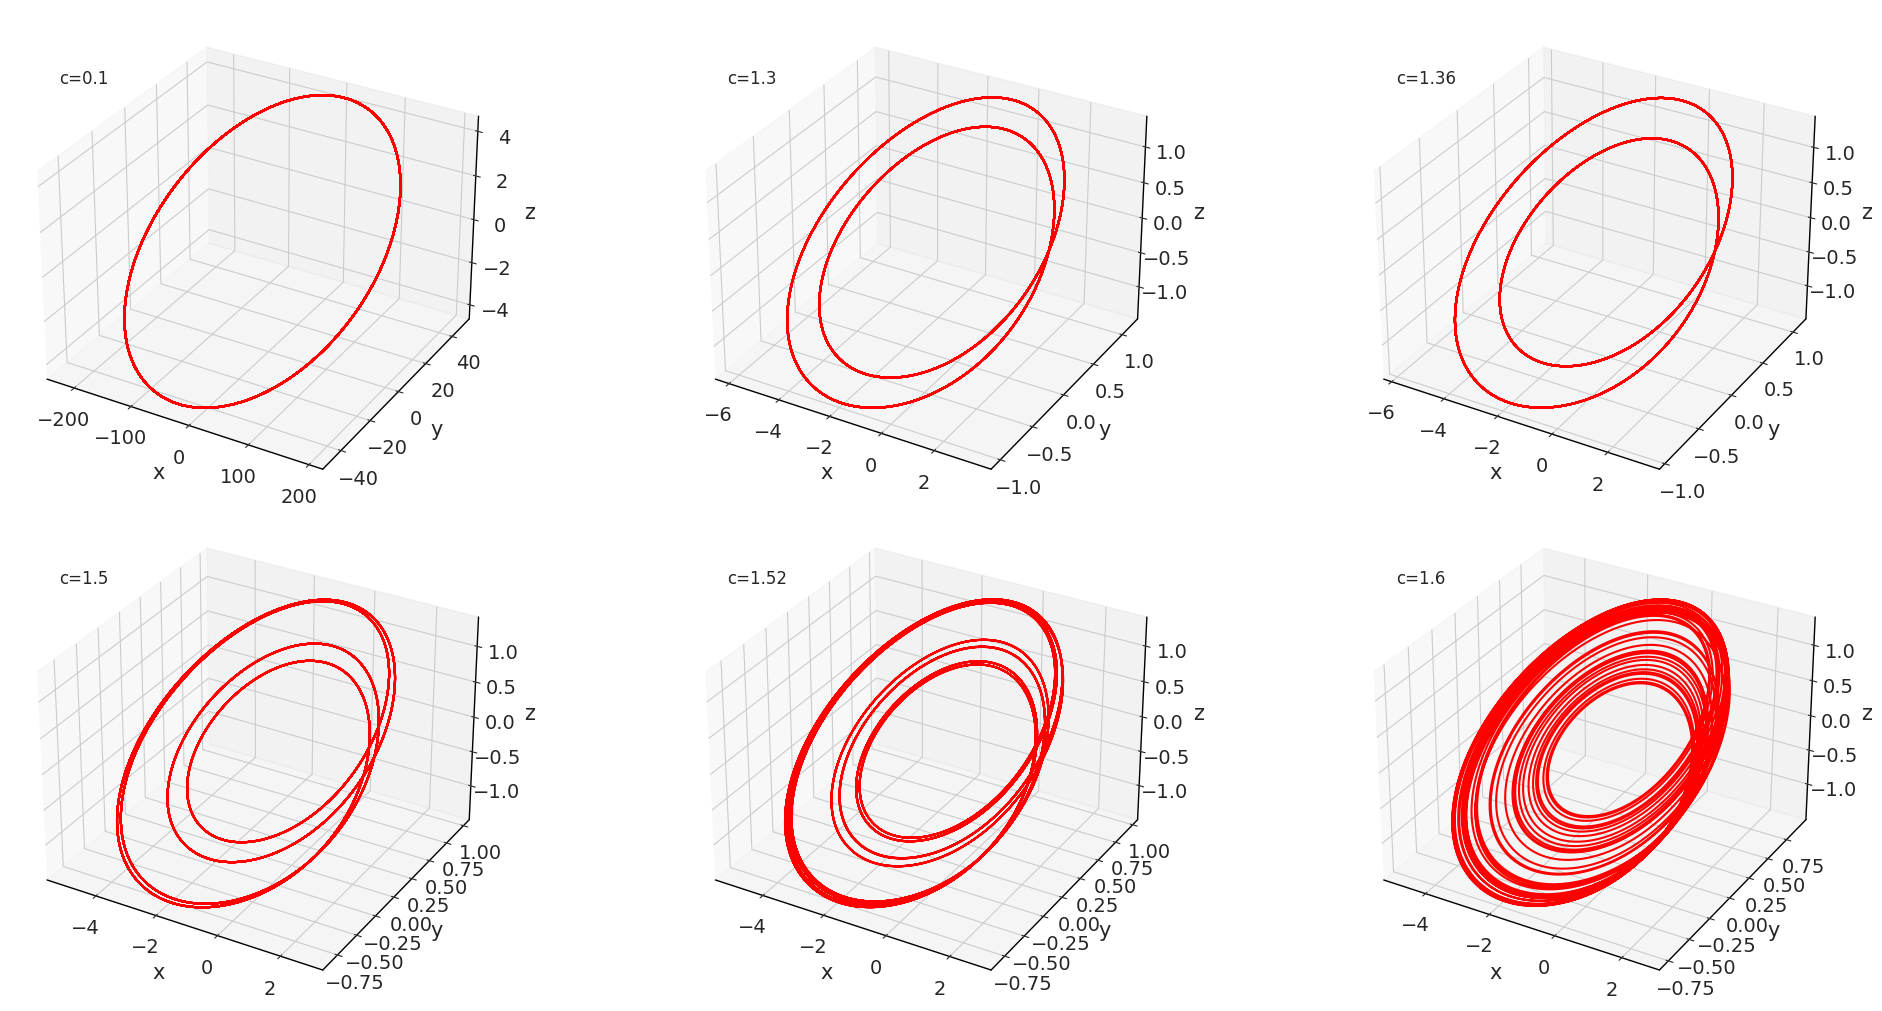

In [44]:
# Step size
dt = 0.001
T = 200

# Parameters
a = -20   
b = 1
#c = 1.68
d = -1

counter=1
fig = plt.figure(figsize=(20,10))
for c in [0.1,1.3,1.36,1.5,1.52,1.6]:

    u, t = ode_RK4(f, np.array([-0.201,-0.001,0.41]), dt, T,a,b,c,d)

    x = [a[0] for a in u[150000:200000]]
    y = [a[1] for a in u[150000:200000]]
    z = [a[2] for a in u[150000:200000]]

    ax = fig.add_subplot(2,3,counter,projection='3d')
    ax.plot(x,y,z, color='red')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    #ax.set_title(f'c={c}')
    ax.text2D(0.1, 0.85, f'c={c}',fontsize=12, transform=ax.transAxes)
    counter = counter+1

plt.savefig('RK4doubling.png')